# Plan 3 : AXISX CLAMP (28x28) image 개별 학습

## 1. Data Preprocessing

In [1]:
import os, re, glob
#import cv2
import numpy as np
#from keras.preprocessing import image
from PIL import Image
from keras.applications.imagenet_utils import preprocess_input

In [19]:
groups_folder_path = './resources/imgs28x28/'
# AXISX 2, 5, 6, 7 CLAMP 2, 3, 5, 6
AXISX_categ = ["AXISX2", "AXISX5", "AXISX6", "AXISX7"]
CLAMP_categ = ["CLAMP2", "CLAMP3", "CLAMP5", "CLAMP6"]
categ = ["AXISX2", "AXISX5", "AXISX6", "AXISX7", "CLAMP2", "CLAMP3", "CLAMP5", "CLAMP6"]
num_classes = 4

In [20]:
image_w = 28
image_h = 28
X = []
Y = []

### - X: image data , Y: class number

In [21]:
def setData_XY(groups_folder_path, category, image_w, image_h):
    X = []
    Y = []
    #data_path = os.listdir(groups_folder_path)
    #print(data_path)
    for filepath in category:
        print(filepath)
        filepath = groups_folder_path + filepath
        files = os.listdir(filepath)
        for data in files:
            img_path = "{0}/{1}".format(filepath, data) # 이미지 경로 확인
            # 이미지 열고 알맞은 사이즈로 저장하기 
            image = Image.open(img_path)
            image = image.convert('L')#흑백으로 맹글기
            #image = image.resize((image_w, image_h))
            img_data = np.array(image)
            img_data = img_data.reshape((image_w, image_h, 1))

            X.append(np.array(img_data))

            seg = data.split('_')[3][0]
            seg = int(seg)

            Y.append(seg)
    return X, Y

#X, Y = setData_XY(groups_folder_path, CLAMP_categ, image_w, image_h)
X, Y = setData_XY(groups_folder_path, AXISX_categ, image_w, image_h)
#X, Y = setData_XY(groups_folder_path, categ, image_w, image_h)

AXISX2
AXISX5
AXISX6
AXISX7


In [22]:
X = np.array(X)
Y = np.array(Y)
print("{}, {}".format(X.shape, Y.shape))
print(X, Y)

(760, 28, 28, 1), (760,)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### - 학습 셋, 훈련 셋 나누기

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

print("{}, {}".format(X_train.shape, Y_train.shape))
print("{}, {}".format(X_test.shape, Y_test.shape))

(570, 28, 28, 1), (570,)
(190, 28, 28, 1), (190,)


## 2. Model

In [24]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers import Flatten, Convolution2D, MaxPooling2D
from keras.models import load_model

### - Normalization

In [25]:
# 데이터 정규화 하기
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

### - 모델 생성 및 훈련 (Auto encoder)

In [9]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(64, (3, 3) #16 is number of filters and (3, 3) is the size of the filter.
, padding='same', input_shape=(96,96,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
 
#2nd convolution layer
model.add(Conv2D(32,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#3rd convolution layer
model.add(Conv2D(16,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#3rd convolution layer
model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
 
#here compressed version

#4th convolution layer
model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#5th convolution layer
model.add(Conv2D(16,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#5th convolution layer
model.add(Conv2D(32,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))
 
#6th convolution layer
model.add(Conv2D(64,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))
 
model.add(Conv2D(1,(3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4

In [9]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(64, (3, 3) #16 is number of filters and (3, 3) is the size of the filter.
, padding='same', input_shape=(96,96,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
 
#2nd convolution layer
model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#3rd convolution layer
model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
 
#here compressed version

#4th convolution layer
model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#5th convolution layer
model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))
 
#6th convolution layer
model.add(Conv2D(16,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))
 
model.add(Conv2D(1,(3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 2)         290       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 2)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 2)         3

In [26]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
input_shape=(28,28,1)
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(16, (3, 3) #16 is number of filters and (3, 3) is the size of the filter.
, padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
 
#2nd convolution layer
model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
 
#here compressed version
 
#3rd convolution layer
model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))
 
#4rd convolution layer
model.add(Conv2D(16,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))
 
model.add(Conv2D(1,(3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 2)         290       
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 2)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 2)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 2)          

In [27]:
#학습
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = model.fit(X_train, X_train, epochs=1000, validation_data=(X_test, X_test))

Epoch 1/1000


In [71]:
model.save_weights('28x28weights.h5')

In [28]:
model.load_weights("P3_weights/CLAMP_weights.h5")

In [ ]:
model.fit(X_train, X_train, epochs=1000, validation_data=(X_test, X_test))

### - 모델 평가

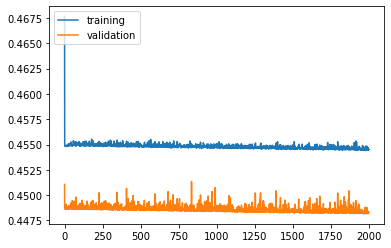

In [72]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

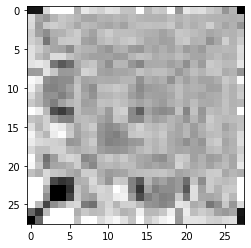

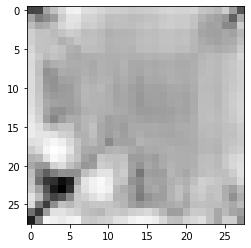

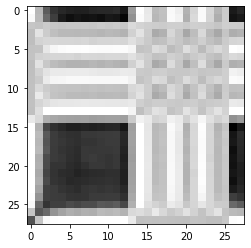

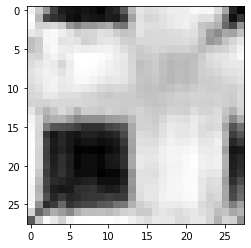

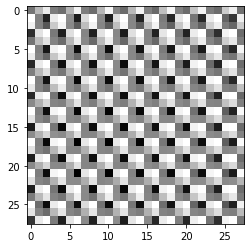

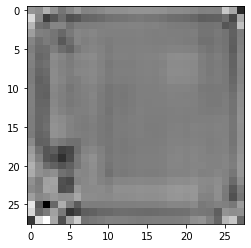

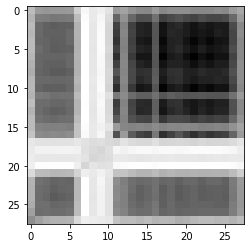

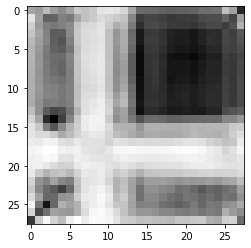

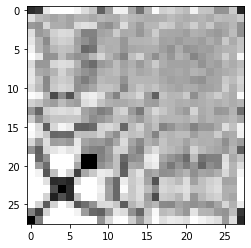

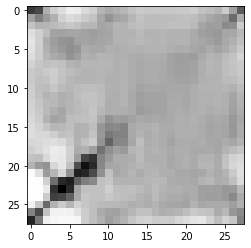

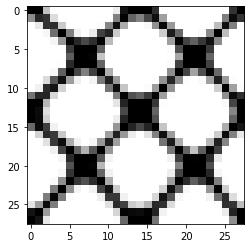

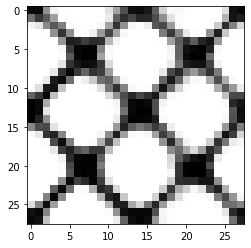

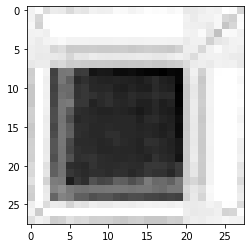

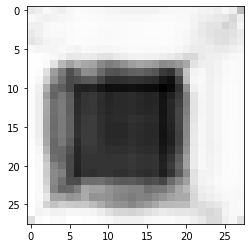

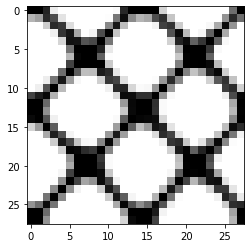

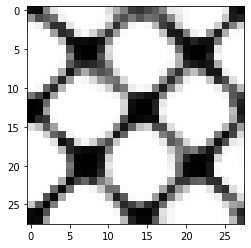

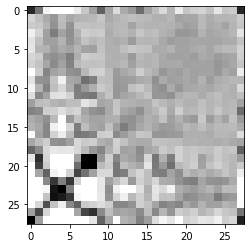

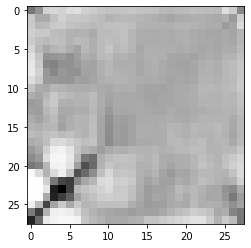

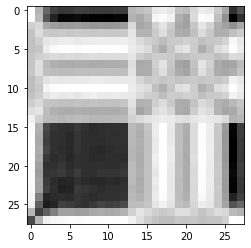

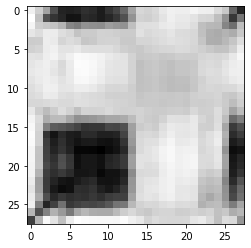

In [22]:
# 모델 복구 (이미지화)
restored_imgs = model.predict(X_test)

for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    plt.show()
 
    plt.imshow(restored_imgs[i].reshape(28, 28))
    plt.gray()
    plt.show()

### - 모델 테스트

In [29]:
X = X.astype('float32') / 255
print(X.shape)

(760, 28, 28, 1)


In [30]:
X1 = X[:380]
X2 = X[380: 760]
X3 = X[760: 1140]
X4 = X[1140: ]
print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)

(380, 28, 28, 1)
(380, 28, 28, 1)
(0, 28, 28, 1)
(0, 28, 28, 1)


In [31]:
from keras import backend as K

#테스트 진행할 전체 데이터 정규화
#X = X.astype('float32') / 255

#compressed_layer = 5
compressed_layer = 5
get_3rd_layer_output = K.function([model.layers[0].input],[model.layers[compressed_layer].output])

In [32]:
compressed = get_3rd_layer_output([X])[0]

In [23]:
compressed1 = get_3rd_layer_output([X1])[0]
compressed2 = get_3rd_layer_output([X2])[0]
compressed3 = get_3rd_layer_output([X3])[0]
compressed4 = get_3rd_layer_output([X4])[0]

print(compressed1.shape)
print(compressed2.shape)
print(compressed3.shape)
print(compressed4.shape)

(380, 6, 6, 2)
(380, 6, 6, 2)
(380, 6, 6, 2)
(380, 6, 6, 2)


In [24]:
compressed = np.concatenate((compressed1, compressed2, compressed3, compressed4), axis=0)

print(compressed.shape)

(1520, 6, 6, 2)


## 3. Clustering & Accuracy

In [15]:
# Needed Library!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 삽입!
import Cluster as c

In [33]:
#일렬로 늘리기
compressed = compressed.reshape(compressed.shape[0],-1)
print(compressed.shape)
#print(compressed)

(760, 98)


### - 군집화

In [34]:
result, scaled_x = c.kmeans(compressed, 4, normalization='none')

정규화 진행 안함
Scaled_dataset: 
[[9.88557637e-01 1.31489325e+00 6.17520511e-01 1.32140505e+00
  6.31026804e-01 1.57336557e+00 5.67279160e-01 1.61354470e+00
  8.20768654e-01 1.60513687e+00 5.49798906e-01 1.69219434e+00
  1.48072529e+00 1.39463735e+00 0.00000000e+00 1.65550089e+00
  0.00000000e+00 1.49747634e+00 0.00000000e+00 1.63560796e+00
  0.00000000e+00 1.53251398e+00 0.00000000e+00 1.47095168e+00
  0.00000000e+00 1.69113183e+00 6.33895576e-01 9.38780904e-01
  0.00000000e+00 1.67764878e+00 0.00000000e+00 1.66510320e+00
  0.00000000e+00 1.82885802e+00 0.00000000e+00 1.77096164e+00
  0.00000000e+00 1.82543612e+00 0.00000000e+00 1.86225152e+00
  6.72979534e-01 1.08972561e+00 0.00000000e+00 1.56777108e+00
  0.00000000e+00 1.49207270e+00 0.00000000e+00 1.82063818e+00
  0.00000000e+00 1.49464893e+00 0.00000000e+00 1.50398135e+00
  0.00000000e+00 1.80027795e+00 6.70143306e-01 1.02435517e+00
  0.00000000e+00 1.55106854e+00 0.00000000e+00 1.53197122e+00
  0.00000000e+00 1.81379509e+00 0.00000000e

In [35]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
#print(scaled_x)
print(result.labels_)
print(result)
#Y = c.getClassLabelFor([0, 1, 2, 3], 190)
#print(Y)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 3 0
 3 3 3 3 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [43]:
result.cluster_centers_

array([[0.13878153, 0.4656841 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.43352768, 0.09761747, 0.13877672,
        0.46570134, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.13877477, 0.46569875,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13877262, 0.46569484, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13878106, 0.46569625, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.13877499, 0.46570066, 0.        , 0.  

### - 정확도 측정

In [36]:
Y_ = c.getClassLabelFor([3, 2, 0 ,1], 190)
print(Y_)

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

In [44]:
i=0
Y_ = Y
for val in Y_:
    if val == 2 :
        Y_[i] = 0
    elif val == 5:
        Y_[i] = 1
    elif val == 6:
        Y_[i] = 2
    elif val == 7:
        Y_[i] = 3
    elif val == 5:
        Y_[i] = 1
    elif val == 6:
        Y_[i] = 2
    elif val == 7:
        Y_[i] = 3
    i += 1

print(Y_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [37]:
accuracy = c.getAccuracy(Y_, result.labels_)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9644736842105263
